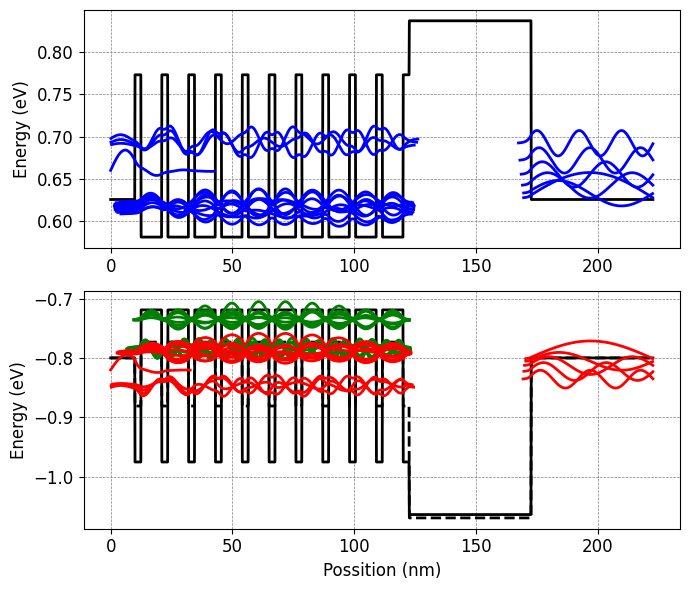

In [30]:
from solcore import si, material
from solcore.structure import Layer, Structure
import solcore.quantum_mechanics as QM

# First we create the materials we need
top = material("GaAs")(T=293, strained = False)
barrier = material("GaAsP")(T=293, P = 0.32, strained = False)
well = material("GaInAs")(T=293, In = 0.11, strained = False)
bottom = material("AlGaAs")(T=293, Al = 0.5, Strained = False) #doesn't recognize name pf compound

# As well as some of the layers
top_layer = Layer(width=si("10nm"), material=top)
barrier_layer = Layer(width=si("2.5nm"), material=barrier)
well_layer = Layer(width=si("8.5nm"), material=well)
bottom_barrier_layer = Layer(width=si("50nm"), material=bottom)
bottom_layer = Layer(width=si("50nm"), material=top)


# Layered quantum wells
layers = [top_layer, barrier_layer] + 10 * [well_layer, barrier_layer] + [bottom_barrier_layer, bottom_layer]

test_structure_1 = Structure(layers, substrate=top)
output_1 = QM.schrodinger(test_structure_1, quasiconfined=0, graphtype='potentials', num_eigenvalues=20, show=True)


C:\Users\mbles\AppData\Local\Temp\ipykernel_18456\1753527861.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(v, tunnel.current, 'k', linewidth=3, color='DimGray', label='Total')


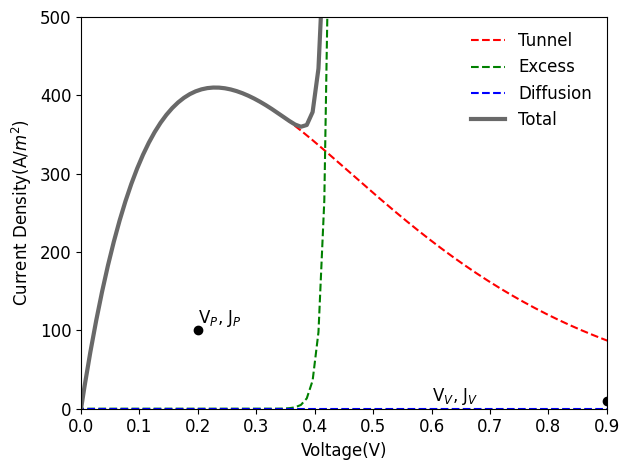

In [32]:
import matplotlib.pyplot as plt
from solcore.structure import TunnelJunction
from solcore.solar_cell_solver import default_options
from solcore.analytic_solar_cells import parametric_tunnel_junction

# We define the tunnel junction and solve its properties
m_e = 9.1093837015*10**(-31) #kg
h_bar = 1.054571817E-34#in J*s
epsilon0 = 8.854187817 * 10**(-12) #C**2/(N*m**2)
epsilon = 11.48*epsilon0
effective_mass = 0.1*m_e
doping_concentration = 10**25 #m^-3
prefactor = (4/(3*h_bar))*((effective_mass*epsilon)/doping_concentration)**0.5
tunnel = TunnelJunction(v_peak=0.23, j_peak=410, v_valley=0.41, j_valley=140, prefactor=100,
                         j01=1e-21, kind='parametric')
parametric_tunnel_junction(tunnel, default_options)
v = tunnel.voltage

plt.plot(v, tunnel.tunnel_current(v), 'r--', label='Tunnel')
plt.plot(v, tunnel.excess_current(v), 'g--', label='Excess')
plt.plot(v, tunnel.diffusion_current(v), 'b--', label='Diffusion')
plt.plot(v, tunnel.current, 'k', linewidth=3, color='DimGray', label='Total')
plt.plot((0.2, 0.9), (100, 10), 'ko')

plt.annotate('V$_P$, J$_P$', xy=(0.2, 110), fontsize=12)
plt.annotate('V$_V$, J$_V$', xy=(0.6, 10), fontsize=12)

plt.legend(fontsize=12, frameon=False)
plt.ylim(0, 500)
plt.xlim(0, 0.9)
plt.ylabel('Current Density(A/$m^2$)', fontsize=12)
plt.xlabel('Voltage(V)', fontsize=12)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

C:\Users\mbles\AppData\Local\Temp\ipykernel_18456\2032323602.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(v, tunnel.current, 'k', linewidth=3, color='DimGray', label='Total')


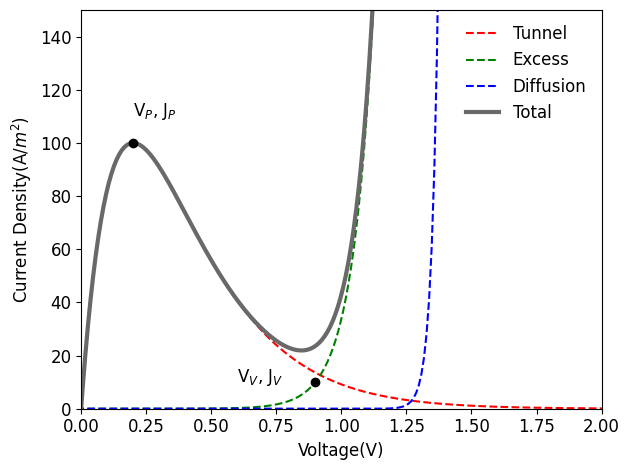

In [33]:
import matplotlib.pyplot as plt

from solcore.structure import TunnelJunction
from solcore.solar_cell_solver import default_options
from solcore.analytic_solar_cells import parametric_tunnel_junction

# We define the tunnel junction and solve its properties
tunnel = TunnelJunction(v_peak=0.2, j_peak=100, v_valley=0.9, j_valley=10, prefactor=prefactor, j01=1e-21, kind='parametric')
parametric_tunnel_junction(tunnel, default_options)

v = tunnel.voltage

plt.plot(v, tunnel.tunnel_current(v), 'r--', label='Tunnel')
plt.plot(v, tunnel.excess_current(v), 'g--', label='Excess')
plt.plot(v, tunnel.diffusion_current(v), 'b--', label='Diffusion')
plt.plot(v, tunnel.current, 'k', linewidth=3, color='DimGray', label='Total')
plt.plot((0.2, 0.9), (100, 10), 'ko')

plt.annotate('V$_P$, J$_P$', xy=(0.2, 110), fontsize=12)
plt.annotate('V$_V$, J$_V$', xy=(0.6, 10), fontsize=12)

plt.legend(fontsize=12, frameon=False)
plt.ylim(0, 150)
plt.xlim(0, 2)
plt.ylabel('Current Density(A/$m^2$)', fontsize=12)
plt.xlabel('Voltage(V)', fontsize=12)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()